In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
columns = ["iyear","success", "suicide", "attacktype1", "attacktype1_txt", "targtype1_txt", "targsubtype1_txt", "target1", "natlty1_txt",
            "gname", "gsubname", "nperps", "weaptype1_txt", "weapsubtype1_txt", "nkill", "nkillus" ]
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2", usecols=columns)

Explanation of selected columns:

    iyear - Year of a terrorist strike
    success - Success of a terrorist strike
    suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
    attacktype1 - The general method of attack
    attacktype1_txt - The general method of attack and broad class of tactics used.
    targtype1_txt - The general type of target/victim
    targsubtype1_txt - The more specific target category
    target1 - The specific person, building, installation that was targeted and/or victimized
    natlty1_txt - The nationality of the target that was attacked
    gname - The name of the group that carried out the attack
    gsubname - Additional details about group that carried out the attack like fractions
    nperps - The total number of terrorists participating in the incident
    weaptype1_txt - General type of weapon used in the incident
    weapsubtype1_txt - More specific value for most of the Weapon Types
    nkill - The number of total confirmed fatalities for the incident
    nkillus - The number of U.S. citizens who died as a result of the incident


In [25]:
df.head()

,iyear,success,suicide,attacktype1,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
0,1970,1,0,1,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1.0,NaN
1,1970,1,0,6,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,7.0,Unknown,NaN,0.0,NaN
2,1970,1,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,NaN,Unknown,NaN,1.0,NaN
3,1970,1,0,3,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN
4,1970,1,0,7,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN



1.  How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?
2.  Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?
3. What are the most common methods of attacks? Does it differ in various regions or in time?
4. Plot the locations of attacks on a map to visualize their regional spread;


In [70]:
attack_counter = df.groupby(["iyear"]).agg("iyear").count()
attack_counter

iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: iyear, dtype: int64

In [84]:
attack_year = sorted(df["iyear"].dropna().unique())
attack_year

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

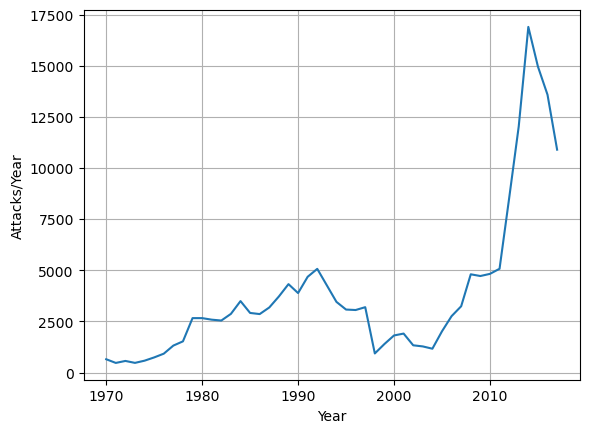

In [92]:
fig,ax = plt.subplots()
ax.plot(attack_year,attack_counter)
ax.set_xlabel("Year")
ax.set_ylabel("Attacks/Year")
ax.grid(True)

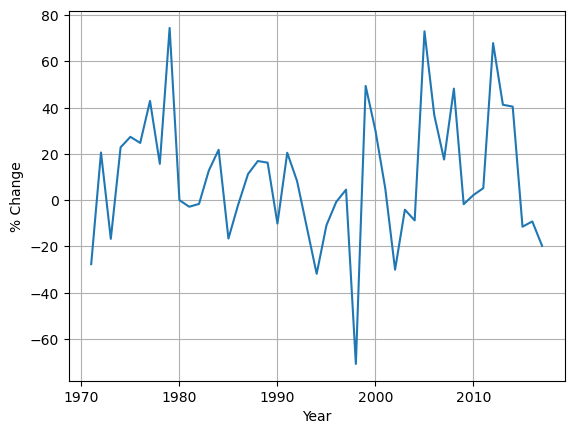

In [107]:
fig,ax = plt.subplots()
ax.plot(attack_year,attack_counter.pct_change()*100)
ax.set_xlabel("Year")
ax.set_ylabel("% Change")
ax.grid(True)

In [114]:
attack_country = df.groupby(["natlty1_txt"]).agg("iyear").count()
attack_country

natlty1_txt
Afghanistan            10931
Albania                   97
Algeria                 2664
Angola                   429
Antigua and Barbuda        1
                       ...  
Yemen                   3123
Yugoslavia               125
Zaire                     31
Zambia                    53
Zimbabwe                  93
Name: iyear, Length: 215, dtype: int64

In [121]:
countries = df["natlty1_txt"].dropna().unique()
countries

215

In [124]:
fig = px.choropleth(df, 
                    locations=countries, 
                    locationmode='country names', 
                    color=attack_country,
                    projection='natural earth')
fig.show()